# Pandas

In [1]:
import numpy as np
import pandas as pd

## Объект Series библиотеки Pandas

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['b']

0.5

## Объект Series как специализированный словарь

In [8]:
population_dict = {'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

## Объект DataFrame библиотеки Pandas

In [9]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [10]:
states = pd.DataFrame({'population': population, 'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [11]:
states.index

Index([u'California', u'Florida', u'Illinois', u'New York', u'Texas'], dtype='object')

In [12]:
states.columns

Index([u'area', u'population'], dtype='object')

## Создание объектов DataFrame

In [13]:
# Из одного объекта Series. 
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [14]:
# Из списка словарей. 
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [15]:
#Из словаря объектов Series. 
pd.DataFrame({'population': population,'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [16]:
#Из двумерного массива NumPy. 
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

,foo,bar
a,0.251419,0.066675
b,0.556847,0.051406
c,0.053276,0.410967


In [18]:
# Из структурированного массива NumPy.
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
print A
pd.DataFrame(A)

[(0, 0.) (0, 0.) (0, 0.)]


,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## Объект Index библиотеки Pandas

In [19]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [20]:
print ind[1]
print ind[::2]
print (ind.size, ind.shape, ind.ndim, ind.dtype)

3
Int64Index([2, 5, 11], dtype='int64')
(5, (5L,), 1, dtype('int64'))


In [21]:
## Одно из различий между объектами Index и массивами NumPy — неизменяемость индексов

## Index как упорядоченное множество

In [22]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
print indA & indB # пересечение
print indA | indB # объединение
print indA ^ indB # симметричная разность

Int64Index([3, 5, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 9, 11], dtype='int64')


## Индексация и выборка данных

## Выборка данных из объекта Series

In [23]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [24]:
data.keys()

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [27]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [28]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [29]:
# срез посредством явного индекса
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [30]:
# срез посредством неявного целочисленного индекса
data[0:2]

a    0.25
b    0.50
dtype: float64

In [31]:
# маскирование
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [32]:
# «прихотливая» индексация
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

## Индексаторы: loc, iloc и ix

In [38]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [39]:
# атрибут loc позволяет выполнить индексацию и срезы с использованием явного индекса
data.loc[1]

'a'

In [44]:
data.loc[1:3]

1    a
3    b
dtype: object

In [45]:
# iloc дает возможность выполнить индексацию и срезы, применяя неявный индекс
data.iloc[1]

'b'

In [46]:
data.iloc[1:3]

3    b
5    c
dtype: object

## Выборка данных из объекта DataFrame

In [47]:
area = pd.Series({'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [49]:
data.area is data['area']

True

In [48]:
data.pop is data['pop']

False

In [50]:
#Добавление еще одного столбца:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


## Объект DataFrame как двумерный массив

In [51]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

In [53]:
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [54]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [55]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [57]:
# Индексатор ix позволяет комбинировать эти два подхода:
data.ix[:3, :'pop']

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [58]:
# В этих индексаторах можно использовать все паттерны доступа к данным в стиле библиотеки NumPy.
# Например, в индексаторе loc можно сочетать маскирование и «прихотливую» индексацию
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [59]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


## Универсальные функции: выравнивание индексов

In [60]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127}, name='population')

In [61]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [62]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [63]:
A.add(B, fill_value=0) # атрибут fill_value заполняет пропуски 0

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [66]:
rng = np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
A

,A,B
0,6,19
1,14,10


In [67]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
B

,B,A,C
0,7,4,6
1,9,2,6
2,7,4,3


In [68]:
A+B

,A,B,C
0,10.0,26.0,NaN
1,16.0,19.0,NaN
2,NaN,NaN,NaN


In [76]:
#В следующем примере мы заполним отсутствующие значения средним значением всех элементов объекта A 
# (которое вычислим, выстроив сначала значения объекта A в один столбец с помощью функции stack1)
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,10.00,26.00,18.25
1,16.00,19.00,18.25
2,16.25,19.25,15.25


## Универсальные функции: выполнение операции между объектами DataFrame и Series

In [80]:
A = rng.randint(10, size=(3, 4))
df = pd.DataFrame(A, columns=list('QRST'))
print df
print ''
print df - df.iloc[0]

   Q  R  S  T
0  3  6  7  2
1  0  3  1  7
2  3  1  5  5

   Q  R  S  T
0  0  0  0  0
1 -3 -3 -6  5
2  0 -5 -2  3


In [81]:
df.subtract(df['R'], axis=0) #столбец R вычитается из каждого столбца df

,Q,R,S,T
0,-3,0,1,-4
1,-3,0,-2,4
2,2,0,4,4


In [82]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    7
Name: 0, dtype: int32

In [83]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-3.0,NaN,-6.0,NaN
2,0.0,NaN,-2.0,NaN


## Обработка отсутствующих данных

In [84]:
# None, объект-одиночка Python, часто применяемый для обозначения отсутствующих данных в коде на языке Python. 
# В силу того что None — объект Python, его нельзя использоватьв произвольных массивах библиотек NumPy/Pandas,
#а только в массивах с типом данных 'object' (то есть массивах объектов языка Python)

In [85]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [86]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

('dtype =', 'object')
10 loops, best of 3: 88.7 ms per loop
()
('dtype =', 'int')
100 loops, best of 3: 2.57 ms per loop
()


In [87]:
# Использование объектов языка Python в массивах означает также, что при выполнении функций агрегирования по массиву 
# со значениями None, например sum() или min(), вам будет возвращена ошибка

## NaN: отсутствующие числовые данные

In [88]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [90]:
print 1 + np.nan
print 0 * np.nan

nan
nan


In [91]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [92]:
# Библиотека NumPy предоставляет специализированные агрегирующие функции, игнорирующие эти пропущенные значения:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

## Значения NaN и None в библиотеке Pandas

In [93]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [94]:
# Библиотека Pandas автоматически выполняет преобразование при обнаружении NA-значений для тех типов, 
# у которых отсутствует значение-индикатор.

## Операции над пустыми значениями

isnull() — генерирует булеву маску для отсутствующих значений.
notnull() — противоположность метода isnull().
dropna() — возвращает отфильтрованный вариант данных.
fillna() — возвращает копию данных, в которой пропущенные значения заполнены или восстановлены.

In [95]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [96]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [97]:
data.dropna() #Удаление пустых значений

0        1
2    hello
dtype: object

In [98]:
data.fillna(0) #заполнение пустых значений

0        1
1        0
2    hello
3        0
dtype: object

In [99]:
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [100]:
df.dropna() # отбрасывает все строки, в которых присутствует хотя бы одно пустое значение

,0,1,2
1,2.0,3.0,5


In [101]:
df.dropna(axis='columns') # задание параметра axis=1 отбрасывает все столбцы, содержащие хотя бы одно пустое значение

,2
0,2
1,5
2,6


In [102]:
# Возможно, вам захочется отбросить строки или столбцы, все значения (или большинство) в которых представляют собой NA. 
# Такое поведение можно задать с помощью параметров how и thresh, обеспечивающих точный контроль допустимого количества 
# пустых значений.

In [103]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [104]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [107]:
# Для более точного контроля можно задать с помощью параметра thresh минимальное количество непустых значений для 
# строки/столбца, при котором он не отбрасывается
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


## Заполнение пустых значений

In [108]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [109]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [110]:
# заполнение по направлению «вперед», копируется предыдущее значение
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [111]:
# заполнение по направлению «назад», копируется следующее значение
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [112]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [113]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Иерархическая индексация

In [115]:
index = pd.MultiIndex.from_tuples([('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010),
                                   ('Texas', 2000), ('Texas', 2010)])
index

MultiIndex(levels=[[u'California', u'New York', u'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [117]:
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [126]:
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [128]:
#Метод unstack() может быстро преобразовать мультииндексный объект Series в индексированный обычным образом объект DataFrame:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [129]:
pop_df.stack() #обратная операция

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [130]:
pop_df = pd.DataFrame({'total': pop, 'under18': [9267089, 9284094, 4687374, 4318033, 5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [131]:
pop_df.stack()

California  2000  total      33871648
                  under18     9267089
            2010  total      37253956
                  under18     9284094
New York    2000  total      18976457
                  under18     4687374
            2010  total      19378102
                  under18     4318033
Texas       2000  total      20851820
                  under18     5906301
            2010  total      25145561
                  under18     6879014
dtype: int64

In [132]:
# В следующем фрагменте кода мы вычисляем по годам долю населения младше 18 лет
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Методы создания мультииндексов

In [134]:
#конструктор список из двух или более индексных массивов
df = pd.DataFrame(np.random.rand(4, 2), 
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.841941  0.572021
  2  0.719143  0.420624
b 1  0.244610  0.513987
  2  0.931231  0.115621

In [135]:
#словарь с соответствующими кортежами в качестве ключей
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [136]:
#Явные конструкторы для объектов MultiIndex
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[[u'a', u'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [137]:
# из списка кортежей, задающих все значения индекса в каждой из точек:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[[u'a', u'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [138]:
#из декартова произведения обычных индексов:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[[u'a', u'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [139]:
# Можно сформировать объект MultiIndex непосредственно с помощью его внутреннего представления, 
# передав в конструктор levels (список списков, содержащих имеющиеся значения индекса для каждого уровня)
# и labels (список списков меток):
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  """


MultiIndex(levels=[[u'a', u'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

## Названия уровней мультииндексов

In [141]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## Мультииндекс для столбцов

In [149]:
# Иерархические индексы и столбцы
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'],['HR', 'Temp']],
names=['subject', 'type'])

In [152]:
# Создаем имитационные данные
data = np.round(np.random.randn(4, 6), 1) #round -округление до 1 цифры после запятой
data[:, ::2] *= 10
data += 37

In [153]:
# Создаем объект DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  37.1  34.0  37.2  30.0  37.9
     2      31.0  36.5  45.0  36.4  40.0  35.5
2014 1      44.0  37.1  36.0  38.7  44.0  35.4
     2      35.0  37.2  34.0  38.4  47.0  35.1

In [154]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      34.0  37.2
     2      45.0  36.4
2014 1      36.0  38.7
     2      34.0  38.4

## Мультииндексация объектов Series

In [166]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [167]:
pop['California', 2000]

33871648

In [168]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [169]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [170]:
pop[:, 2000] 

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [171]:
pop[pop > 22000000] #маскирование

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [172]:
pop[['California', 'Texas']] #прихотливая индексация

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

## Мультииндексация объектов DataFrame

In [173]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  37.1  34.0  37.2  30.0  37.9
     2      31.0  36.5  45.0  36.4  40.0  35.5
2014 1      44.0  37.1  36.0  38.7  44.0  35.4
     2      35.0  37.2  34.0  38.4  47.0  35.1

In [174]:
health_data['Guido', 'HR']

year  visit
2013  1        34.0
      2        45.0
2014  1        36.0
      2        34.0
Name: (Guido, HR), dtype: float64

In [175]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      43.0  37.1
     2      31.0  36.5

In [176]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        43.0
      2        31.0
2014  1        44.0
      2        35.0
Name: (Bob, HR), dtype: float64

In [185]:
# сформировать срез явным образом можно с помощью встроенной функции Python slice(),
# но лучше в данном случае использовать объект IndexSlice, предназначенный библиотекой Pandas как раз для подобной ситуации.
idx = pd.IndexSlice
health_data.loc[idx[:, 2], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,2,31.0,45.0,40.0
2014,2,35.0,34.0,47.0


## Перегруппировка мультииндексов

## Отсортированные и неотсортированные индексы

In [186]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.526954
      2      0.327996
c     1      0.086700
      2      0.061947
b     1      0.488514
      2      0.578056
dtype: float64

In [187]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [188]:
#сортировка мультииндекса sort_index() и sortlevel()
data = data.sort_index()
data

char  int
a     1      0.526954
      2      0.327996
b     1      0.488514
      2      0.578056
c     1      0.086700
      2      0.061947
dtype: float64

In [189]:
data['a':'b']

char  int
a     1      0.526954
      2      0.327996
b     1      0.488514
      2      0.578056
dtype: float64

## Выполнение над индексами операций stack и unstack

In [190]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [191]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [192]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## Создание и перестройка индексов

In [193]:
pop_flat = pop.reset_index(name='population') #преобразует мультииндекс в формат datafram-a
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [194]:
pop_flat.set_index(['state', 'year']) # преобразует выбранные столбцы df в мультииндекс

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Агрегирование по мультииндексам

In [195]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  37.1  34.0  37.2  30.0  37.9
     2      31.0  36.5  45.0  36.4  40.0  35.5
2014 1      44.0  37.1  36.0  38.7  44.0  35.4
     2      35.0  37.2  34.0  38.4  47.0  35.1

In [207]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     37.0  36.80  39.5  36.80  35.0  36.70
2014     39.5  37.15  35.0  38.55  45.5  35.25

In [208]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,37.166667,36.766667
2014,40.000000,36.983333


## Объединение наборов данных: конкатенация и добавление в конец

In [210]:
def make_df(cols, ind):
    """Быстро создаем объект DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)
# Экземпляр DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [211]:
# Простая конкатенация с помощью метода pd.concat
# Сигнатура функции pd.concat в библиотеке Pandas v0.18
#pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, 
#          names=None, verify_integrity=False, copy=True)

In [212]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [213]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [218]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


## Дублирование индексов

In [216]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # Дублируем индексы!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [219]:
#Перехват повторов как ошибки.
try:
    pd.concat([x, y], verify_integrity=True) # флаг verify_integrity. В случае равного True значения этого флага 
                                            #конкатенация приведет к генерации ошибки при наличии дублирующихся индексов.
except ValueError as e:
    print("ValueError:", e)

('ValueError:', ValueError("Indexes have overlapping values: Int64Index([0, 1], dtype='int64')",))


In [220]:
#Игнорирование индекса.
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [221]:
#Добавление ключей мультииндекса. Еще один вариант — воспользоваться параметром keys для задания меток для источников данных.
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


## Конкатенация с использованием соединений

In [222]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


По умолчанию элементы, данные для которых отсутствуют, заполняются NA-значениями. 
Чтобы поменять это поведение, можно указать одну из нескольких опций для параметров join и join_axes функции конкатенации.
По умолчанию соединение — объединение входных столбцов (join='outer'), но есть возможность поменять это поведение 
на пересечение столбцов с помощью опции join='inner':

In [223]:
print(df5); print(df6);
print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


Еще одна опция предназначена для указания явным образом индекса оставшихся столбцов с помощью аргумента join_axes, 
которому присваивается список объектов индекса. В данном случае мы указываем, что возвращаемые столбцы должны совпадать 
со столбцами первого из конкатенируемых объектов DataFrame:

In [224]:
print(df5); print(df6);
print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


## Метод append()

In [225]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


## Объединение наборов данных: слияние и соединение

In [231]:
#Соединения «один-к-одному»
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering','HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [233]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [234]:
#Соединения «многие-к-одному»
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [235]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## Задание ключа слияния

In [236]:
#Ключевое слово on (слияние по заданному столбцу)
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [237]:
#Ключевые слова left_on и right_on (слияние происходит по двум указанным столбцам)

df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [238]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1) #удаление лишнего столбца

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


## Ключевые слова left_index и right_index (слияние по индексу)

In [239]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [240]:
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [243]:
#метод join(), выполняющий по умолчанию слияние по индексам
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [245]:
#слияние по индексу и столбцу
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


# Задание операций над множествами для соединений

In [246]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'], 'food': ['fish', 'beans', 'bread']}, columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'], 'drink': ['wine', 'beer']}, columns=['name', 'drink'])
print(df6); 
print(df7);
print pd.merge(df6, df7, how='inner') #пересечение 

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [248]:
print(pd.merge(df6, df7, how='outer')) #объединение

     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [249]:
#Левое соединение (left join) и правое соединение (right join) выполняют соединение по записям слева и справа соответственно.
print(pd.merge(df6, df7, how='left'))

    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


# Пересекающиеся названия столбцов: ключевое слово suffixes

In [250]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [252]:
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])) #задание своих суффиксов в названии столбцов

   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


# Пример: данные по штатам США

In [255]:
# Инструкции системного командного процессора для скачивания данных:
# !curl -O https://raw.githubusercontent.com/jakevdp/
# data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/
# data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/
# data-USstates/master/state-abbrevs.csv

In [256]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [262]:
print pop.shape
print areas.shape
print abbrevs.shape

(2544, 4)
(52, 2)
(51, 2)


In [265]:
merged = pd.merge(pop, abbrevs, how='outer',
left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # Удаляем дублирующуюся информацию
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [271]:
merged.isnull().any() #проверяет есть ли пропуски значений в колонках

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [273]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [276]:
merged.loc[merged['state'].isnull(), 'state/region'].unique() # метод unique возвращает уникальные значения признака 

array(['PR', 'USA'], dtype=object)

In [277]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [284]:
final = pd.merge(merged,areas, on='state', how='outer')
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [287]:
final.columns

Index([u'state/region', u'ages', u'year', u'population', u'state',
       u'area (sq. mi)'],
      dtype='object')

In [290]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [291]:
final.dropna(inplace=True)

In [296]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [314]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [309]:
data2010_my = final[final['year']==2010][final['ages']=='total']
data2010_my.head()

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [315]:
data2010.set_index('state', inplace=True)
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [316]:
density = data2010['population']/data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [318]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# Агрегирование и группировка

In [319]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [320]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [321]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


Таблица 3.3. Список агрегирующих методов библиотеки Pandas

count() Общее количество элементов
first(), last() Первый и последний элементы
mean(), median() Среднее значение и медиана
min(), max() Минимум и максимум
std(), var() Стандартное отклонение и дисперсия
mad() Среднее абсолютное отклонение
prod() Произведение всех элементов
sum() Сумма всех элементов

## GroupBy: разбиение, применение, объединение

In [322]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [323]:
df.groupby('key') #key - имя столбца по которому данные будут разбиты на группы

In [324]:
df.groupby('key').sum() #суммирование элементов для каждой из групп

,data
key,
A,3
B,5
C,7


# Объект GroupBy

## Индексация по столбцам.

In [325]:
planets.groupby('method') #разбение по группам на основе метода открытия планеты

In [326]:
planets.groupby('method')['orbital_period']

In [327]:
planets.groupby('method')['orbital_period'].median() 

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

## Цикл по группам.

In [329]:
for (method, group) in planets.groupby('method'): #возвращает каждую группу как отдельный объект Series или DataFrame
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


## Методы диспетчеризации.

In [332]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


# Агрегирование, фильтрация, преобразование, применение

In [333]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data1': range(6), 'data2': rng.randint(0, 10, 6)}, 
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Агрегирование.

In [334]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [335]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### Фильтрация.

In [336]:
def filter_func(x):
    return x['data2'].std() > 4
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


Функция filter() возвращает булево значение, определяющее, прошла ли группа фильтрацию. В данном случае, поскольку стандартное отклонение группы A превышает 4, она удаляется из итогового результата.

### Преобразование.

In [337]:
df.groupby('key').transform(lambda x: x - x.mean()) # центрирование данных по группам

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


# Метод apply().

Метод apply() позволяет применять произвольную функцию к результатам группировки. В качестве параметра эта функция должна получать объект DataFrame, а возвращать или объект библиотеки Pandas (например, DataFrame, Series), или скалярное значение, в зависимости от возвращаемого значения будет вызвана соответствующая операция объединения.

In [339]:
def norm_by_data2(x): #нормировка первого столбца на сумму значений второго по группам
    # x – объект DataFrame сгруппированных значений
    x['data1'] /= x['data2'].sum()
    return x
print(df); print(df.groupby('key').apply(norm_by_data2)) 

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


## Задание ключа разбиения

In [340]:
L = [0, 1, 0, 1, 2, 0] #список ключей
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [343]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'} #словарь связывающий ключи групп с индексами
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


In [344]:
# функция python, принимающая на вход индексы и возвращающая группу
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [345]:
# комбинирование группировок с использованием мультииндекса
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


## Пример группировки

In [358]:
decade = 10 * (planets['year'] // 10.)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980.0s,1990.0s,2000.0s,2010.0s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Сводные таблицы

In [359]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [360]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [364]:
titanic.groupby(['sex','pclass']).mean()

survived        age     sibsp     parch        fare  \
sex    pclass                                                        
female 1       0.968085  34.611765  0.553191  0.457447  106.125798   
       2       0.921053  28.722973  0.486842  0.605263   21.970121   
       3       0.500000  21.750000  0.895833  0.798611   16.118810   
male   1       0.368852  41.281386  0.311475  0.278689   67.226127   
       2       0.157407  30.740707  0.342593  0.222222   19.741782   
       3       0.135447  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    pclass                        
female 1         0.000000  0.361702  
       2         0.000000  0.421053  
       3         0.000000  0.416667  
male   1         0.975410  0.614754  
       2         0.916667  0.666667  
       3         0.919308  0.760807

In [365]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Синтаксис сводных таблиц

In [366]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [367]:
age = pd.cut(titanic['age'], [0, 18, 80]) #функция cut разбивает данные на промежутки
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [368]:
fare = pd.qcut(titanic['fare'], 2) #функци qcut автоматически вычисляет квантили
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

# Cигнатура вызова в версии 0.181 библиотеки Pandas
## DataFrame.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

In [371]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [373]:
#MARGINS - ИТОГИ ВЫЧИСЛЕНИЙ (СТРОКА И СТОЛБЕЦ ALL)
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Пример: данные о рождаемости

In [374]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [379]:
births.pivot_table('births',index='year',columns=['gender','month']).head()

gender           F                                                    \
month           1            2           3            4           5    
year                                                                   
1969    4491.56250  4136.187500  4502.62500  4289.375000  4403.68750   
1970    4586.06250  4307.062500  4662.43750  4375.250000  4529.25000   
1971    4758.81250  4609.666667  4697.62500  4343.437500  4316.81250   
1972    4224.68750  4136.645161  4165.15625  3880.562500  4097.90625   
1973    4067.59375  3923.933333  4117.84375  3892.354839  3876.90625   

gender                                                             ...  \
month            6           7          8           9          10  ...   
year                                                               ...   
1969    4434.500000  4831.68750  4870.5000  4762.18750  4741.6875  ...   
1970    4618.437500  4996.00000  5024.8125  5040.56250  4962.7500  ...   
1971    4509.806452  4613.56250  4774.9375  4771.31250  4645.5000  ...   
1972    3961.906250  4238.75000  4375.1250  4333.81250  4207.0000  ...   
1973    3859.781250  4189.09375  4304.3750  4163.09375  4050.3750  ...   

gender           M                                                  \
month           3           4          5            6           7    
year                                                                 
1969    4764.56250  4543.06250  4631.4375  4678.312500  5116.93750   
1970    4945.31250  4596.31250  4787.6250  4862.125000  5330.62500   
1971    4937.12500  4603.56250  4587.1250  4553.562500  4934.37500   
1972    4386.25000  4090.53125  4348.3125  4304.774194  4457.12500   
1973    4304.21875  3981.84375  4100.1875  4102.687500  4433.84375   

gender                                                             
month           8          9           10          11          12  
year                                                               
1969    5161.81250  5007.1875  5007.43750  4752.81250  5021.87500  
1970    5329.12500  5349.9375  5175.43750  4949.75000  5281.56250  
1971    5010.12500  4964.1250  4831.00000  4517.00000  4576.62500  
1972    4642.68750  4512.3125  4414.96875  4238.53125  4423.65625  
1973    4514.03125  4324.5625  4275.12500  4061.78125  4174.50000  

[5 rows x 24 columns]

In [380]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


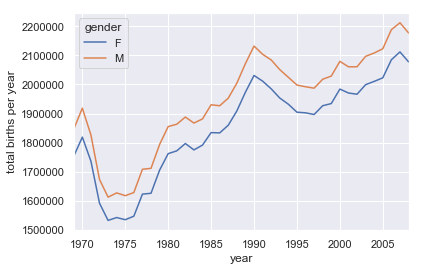

In [381]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # Используем стили библиотеки Seaborn
births.pivot_table('births', index='year', columns='gender',
aggfunc='sum').plot()
plt.ylabel('total births per year'); # общее количество новорожденных в течение года

In [382]:
quartiles = np.percentile(births['births'], [25, 50, 75]) #вычисление квантилей
mu = quartiles[1]  #оценка среднего
sig = 0.74 * (quartiles[2] - quartiles[0]) # оценка дисперсии

In [384]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)') #удаление элементов 

In [385]:
# делаем тип столбца 'day' целочисленным;
# изначально он был строчным из-за пустых значений
births['day'] = births['day'].astype(int)

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [386]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek # День недели

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


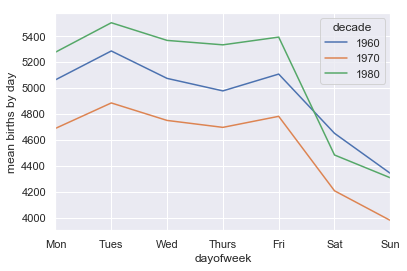

In [387]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day'); # среднее количество новорожденных в день

In [391]:
# строим таблицу с мультииндексом месяц-день
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index.names=['month','day']
births_by_date.head()


births
month day          
1     1    4009.225
      2    4247.400
      3    4500.900
      4    4571.350
      5    4603.625

In [389]:
#связываем день и месяц с фиктивным годом
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


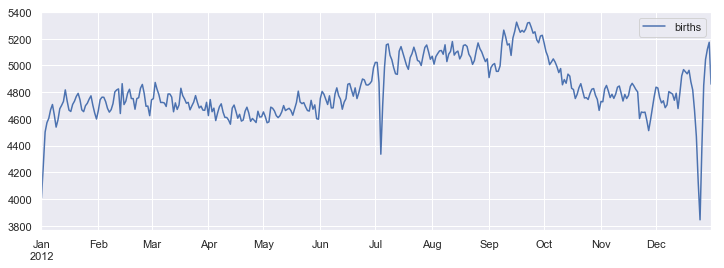

In [390]:
# Строим график результатов
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Операции над строками

In [392]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [393]:
names.str.capitalize() #Преобразование строчных букв в заглавные с игнорированием пропущенных значений

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

# Методы, аналогичные строковым методам языка Python
Практически для всех встроенных строковых методов Python есть соответствующий векторизованный строковый метод библиотеки Pandas. Вот список методов атрибута str библиотеки Pandas, дублирующий строковые методы языка Python:
len() lower() translate() islower()
ljust() upper() startswith() isupper()
rjust() find() endswith() isnumeric()
center() rfind() isalnum() isdecimal()
zfill() index() isalpha() split()
strip() rindex() isdigit() rsplit()
rstrip() capitalize() isspace() partition()
lstrip() swapcase() istitle() rpartition()

In [394]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [395]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [396]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [397]:
monte.str.startswith('T') #есть ли символ T

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [398]:
monte.str.split() #РАЗБИЕНИЕ НА СЛОВА

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

# Методы, использующие регулярные выражения

match()- Вызывает функцию re.match() для каждого элемента, возвращая булево значение

extract() - Вызывает функцию re.match() для каждого элемента, возвращая подходящие группы в виде строк

findall() - Вызывает функцию re.findall() для каждого элемента

replace() - Заменяет вхождения шаблона какой-либо другой строкой

contains() - Вызывает функцию re.search() для каждого элемента, возвращая булево значение

count() - Подсчитывает вхождения шаблона

split() - Эквивалент функции str.split(), но принимающий на входе регулярные выражения

rsplit() - Эквивалент функции str.rsplit(), но принимающий на входе регулярные выражения

In [399]:
monte.str.extract('([A-Za-z]+)') #поиск непрерывной группы символов в начале

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [400]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$') #найти все имена, начинающиеся и заканчивающиеся согласным звуком

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

## Прочие методы

get() - Индексирует все элементы

slice() - Вырезает подстроку из каждого элемента

slice_replace() - Заменяет в каждом элементе вырезанную подстроку заданным значением

cat() - Конкатенация строк

repeat() - Повторяет значения (указанное число раз)

normalize() - Возвращает версию строки в кодировке Unicode

pad() - Добавляет пробелы слева, справа или с обеих сторон строки

wrap() - Разбивает длинные строковые значения на строки длины, не превышающей заданную

join() - Объединяет строки из всех элементов с использованием заданного разделителя

get_dummies() - Извлекает значения переменных-индикаторов в виде объекта DataFrame

In [401]:
print monte.str[0:3]
print monte.str.slice(0,3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object
0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object


In [402]:
monte.str.split().str.get(-1) #для извлечения фамилии из каждой записи можно использовать вместе методы split() и get()

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

# Индикаторные переменные.
Еще один метод, требующий некоторых дополнительных пояснений, — get_dummies(). Удобно, когда в данных имеется столбец, содержащий кодированный индикатор. Например, у нас есть набор данных, содержащий информацию в виде кодов, таких как A="родился в США", B="родился в Великобритании", C="любит сыр", D="любит мясные консервы":

In [404]:
full_monte = pd.DataFrame({'name': monte, 'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [405]:
full_monte['info'].str.get_dummies('|') #разбиение и кодировка индикаторных переменных 

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# Пример: база данных рецептов

In [2]:
import numpy as np
import pandas as pd
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

('ValueError:', ValueError('Trailing data',))


In [3]:
with open('recipeitems-latest.json') as f: #проверяем что каждая строка есть отдельный json файл
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [4]:
# Читаем весь файл в массив Python
with open('recipeitems-latest.json', 'r') as f:
    # Извлекаем каждую строку
    data = (line.strip() for line in f)
    # Преобразуем так, чтобы каждая строка была элементом списка
    data_json = "[{0}]".format(','.join(data))
# Читаем результат в виде JSON
recipes = pd.read_json(data_json)

In [5]:
recipes.shape

(173278, 17)

In [8]:
recipes.iloc[0]

_id                              {u'$oid': u'5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

In [9]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [10]:
recipes.name[np.argmax(recipes.ingredients.str.len())] #название рецепта с самым длинным списком ингридеентов

C:\Users\Vladuk\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


u'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [11]:
recipes.description.str.contains('[Bb]reakfast').sum() #сколько рецептов для завтраков 

3524

In [12]:
recipes.ingredients.str.contains('[Cc]innamon').sum() #сколько рецептов содержат корицу

10526

## Простая рекомендательная система для рецептов

In [14]:
#список ингридеентов трав и специй
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [15]:
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE)) for spice in spice_list))
spice_df.head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [18]:
selection = spice_df.query('parsley & paprika & tarragon') #выбор рецептов, содержащих  parsley & paprika & tarragon
len(selection)

10

In [19]:
recipes.name[selection.index] #название этих рецептов

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

# Работа с временными рядами

In [20]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [21]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [22]:
date.strftime('%A')

'Saturday'

## Типизированные массивы значений времени: тип datetime64 библиотеки NumPy

In [27]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [28]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [29]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [33]:
np.datetime64('2015-07-04T12:00')

numpy.datetime64('2015-07-04T12:00')

In [35]:
np.datetime64('2015-07-04T12:59:59.50', 'ns') #Выбор базовой единицы в 1ns

numpy.datetime64('2015-07-04T12:59:59.500000000')

## Даты и время в библиотеке Pandas: избранное из лучшего

Библиотека Pandas предоставляет, основываясь на всех только что обсуждавшихся инструментах, объект Timestamp, сочетающий удобство использования datetime и dateutil с эффективным хранением и векторизованным интерфейсом типа numpy.datetime64. Библиотека Pandas умеет создавать из нескольких таких объектов Timestamp объект класса DatetimeIndex, который можно использовать для индексации данных в объектах Series или DataFrame.

In [36]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [37]:
date.strftime('%A')

'Saturday'

In [38]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Временные ряды библиотеки Pandas: индексация по времени

In [39]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [40]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [41]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Структуры данных для временных рядов библиотеки Pandas


Для меток даты/времени библиотека Pandas предоставляет тип данных Timestamp. Этот тип является заменой для нативного типа данных datetime языка Python, он основан на более эффективном типе данных numpy.datetime64. Соответствующая индексная конструкция — DatetimeIndex.


Для периодов времени библиотека Pandas предоставляет тип данных Period. Этот тип на основе типа данных numpy.datetime64 кодирует интервал времени фиксированной периодичности. Соответствующая индексная конструкция — PeriodIndex.


Для временных дельт (продолжительностей) библиотека Pandas предоставляет тип данных Timedelta. Timedelta — основанная на типе numpy.timedelta64 более эффективная замена нативного типа данных datetime.timedelta языка Python. Соответствующая индексная конструкция — TimedeltaIndex.

Самые базовые из этих объектов даты/времени — объекты Timestamp и DatetimeIndex. Хотя к ним и можно обращаться непосредственно, чаще используют функцию pd.to_datetime(), умеющую выполнять синтаксический разбор широкого диапазона форматов. При передаче в функцию pd.to_datetime() отдельной даты она возвращает Timestamp, при передаче ряда дат по умолчанию возвращает DatetimeIndex:


In [42]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Любой объект DatetimeIndex можно с помощью функции to_period() преобразовать в объект PeriodIndex, указав код для периодичности интервала. В данном случае мы использовали код 'D', означающий, что периодичность интервала — один день:

In [43]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [45]:
dates - dates[0] #создание объекта типа TimedeltaIndex

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Регулярные последовательности: функция pd.date_range().

In [46]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [49]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [50]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Таблица 3.7. Список кодов периодичности библиотеки Pandas

D - Календарный день    B - Рабочий день  W Неделя   M Конец месяца

BM Конец отчетного месяца       Q Конец квартала         BQ Конец отчетного квартала

A Конец года   BA Конец финансового года   H Час

BH Рабочие часы        T Минута    S Секунд    L Миллисекунда

U Микросекунда      N Наносекунда

## Список стартовых кодов периодичности

MS Начало месяца
BMS Начало отчетного месяца
QS Начало квартала
BQS Начало отчетного квартала
AS Начало года
BAS Начало финансового года

In [51]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [57]:
from pandas_datareader import data

In [58]:
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [60]:
goog = goog['Close']

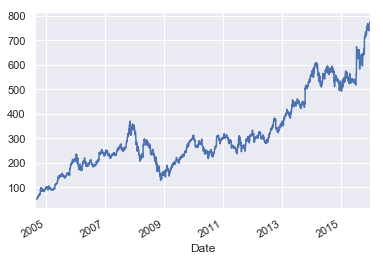

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog.plot()

# Передискретизация и изменение периодичности интервалов

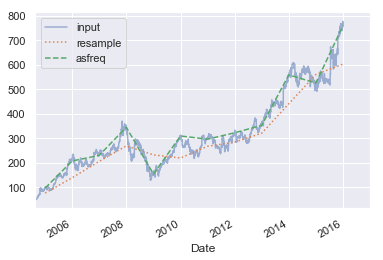

In [63]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':') #агрегирование данных (выдает среднее значение за предыдущий год)
goog.asfreq('BA').plot(style='--'); #выборка данных (значение на конец года)
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

Аналогично обсуждавшейся выше функции pd.fillna() метод asfreq() принимает аргумент method, определяющий, откуда будут браться значения для точек  заполненных значениями NA.

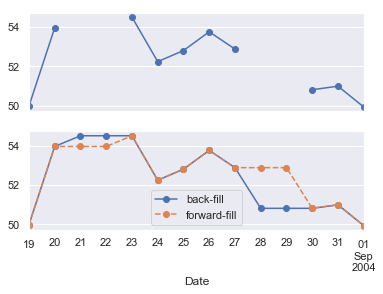

In [66]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') 
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

# Временные сдвиги

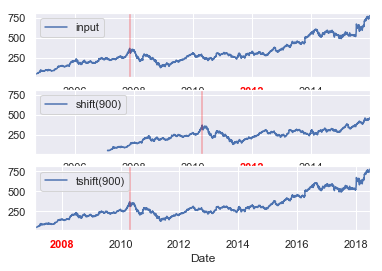

In [67]:
fig, ax = plt.subplots(3, sharey=True)
# задаем периодичность данных
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1]) #сдвиг данных по времени на 900 дней
goog.tshift(900).plot(ax=ax[2]) # сдвиг индекса на 900 дней
# Легенды и пояснения
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

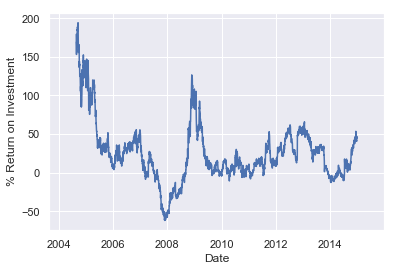

In [68]:
# сдвиг данных используется, например, для вычисления прибыли от вложений на всем наборе данных
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment'); # Прибыль от вложений

# Скользящие окна

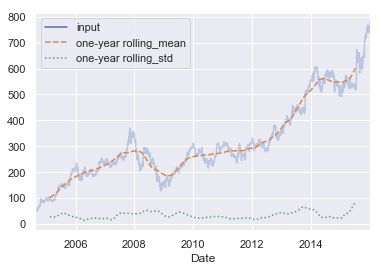

In [89]:
rolling = goog.rolling(365, center=True) #скользящее среднее за 360 дней
data = pd.DataFrame({'input': goog, 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

# Пример: визуализация количества велосипедов в Сиэтле

In [93]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100  239k    0  239k    0     0  57219      0 --:--:--  0:00:04 --:--:-- 57232
100  607k    0  607k    0     0   115k      0 --:--:--  0:00:05 --:--:--  115k
100 1023k    0 1023k    0     0   162k      0 --:--:--  0:00:06 --:--:--  170k
100 1390k    0 1390k    0     0   190k      0 --:--:--  0:00:07 --:--:--  299k
100 1758k    0 1758k    0     0   212k      0 --:--:--  0:00:08 --:--:--  357k
100 2002k    0 2002k    0     0   226k      0 --:--:--  0:00:08 --:--:--  387k


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [95]:
data.columns = ['Total','East', 'West']
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [96]:
data.dropna().describe()

,Total,East,West
count,64238.000000,64238.000000,64238.000000
mean,113.910131,52.153959,61.756172
std,145.289364,67.179748,90.507860
min,0.000000,0.000000,0.000000
25%,15.000000,6.000000,7.000000
50%,61.000000,29.000000,30.000000
75%,148.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


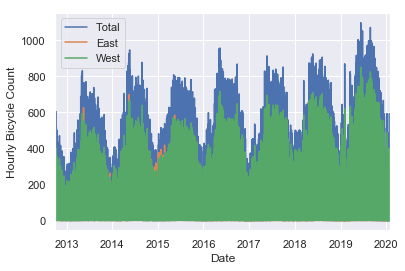

In [97]:
data.plot()
plt.ylabel('Hourly Bicycle Count'); # Количество велосипедов по часам

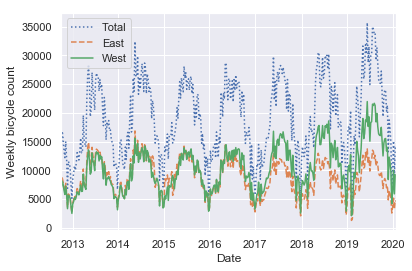

In [98]:
# передискритизация с шагом одна неделя
weekly = data.resample('W').sum() #число велосипедов за неделю
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count'); # Количество велосипедов еженедельно

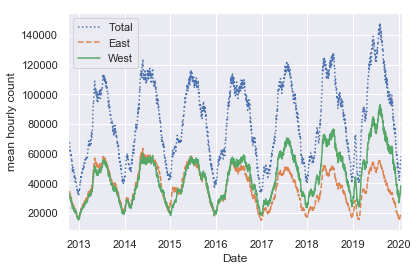

In [99]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-']) #вычисление скользящего среднего за 30 дней
plt.ylabel('mean hourly count') # Среднее количество по часам

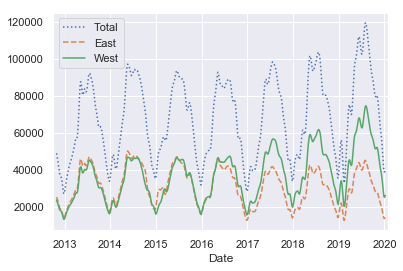

In [100]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']) #сгладили окно

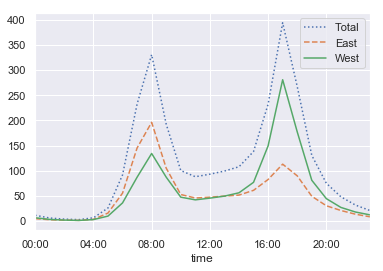

In [101]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

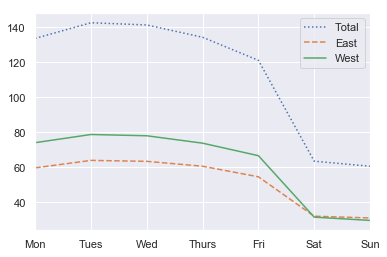

In [102]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [117]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend') #создает массив с метками выходного и буднего  дней
by_time = data.groupby([weekend, data.index.time]).mean()

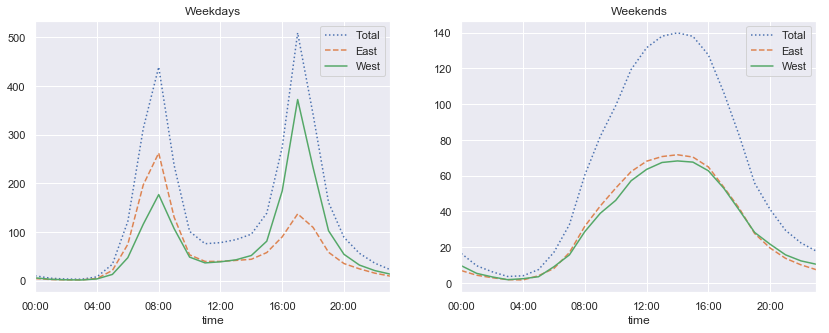

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hourly_ticks, style=[':', '--', '-'])

# Увеличение производительности библиотеки Pandas: eval() и query()

In [131]:
#numexpr.evaluate эффективна при вычислении составных выражений типа (x > 0.5) & (y < 0.5)
rng = np.random.RandomState(42)
x = rng.rand(10000000)
y = rng.rand(10000000)
%timeit (x > 0.5) & (y < 0.5)

10 loops, best of 3: 35.8 ms per loop


In [132]:
import numexpr
%timeit numexpr.evaluate('(x > 0.5) & (y < 0.5)')

10 loops, best of 3: 31.4 ms per loop


# Использование функции pandas.eval() для эффективных операций

In [133]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
for i in range(4))

In [134]:
%timeit df1 + df2 + df3 + df4

10 loops, best of 3: 154 ms per loop


In [135]:
%timeit pd.eval('df1 + df2 + df3 + df4')

1 loop, best of 3: 73.3 ms per loop


In [136]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4')) #проверка эквивалентности операций

True

In [137]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))


In [138]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5') # арифметические операторы
np.allclose(result1, result2)

True

In [139]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4') #операторы сравнения
np.allclose(result1, result2)

True

In [140]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)') #побитовые операторы
np.allclose(result1, result2)

True

In [141]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]') #поддерживает доступ к атрибутам
np.allclose(result1, result2)

True

# Использование метода DataFrame.eval() для выполнения операций по столбцам

In [142]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [143]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [144]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

In [145]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


# Локальные переменные в методе DataFrame.eval()

In [146]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean') #работа с локальной переменной column_mean
np.allclose(result1, result2)

True

# Метод DataFrame.query() для  операций фильтрации

In [147]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
result3 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2, result3)

True

In [148]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean') # работа с локальной переменной
np.allclose(result1, result2)

True

Преимущество метода eval/query заключается в экономии оперативной памяти и иногда — в более понятном синтаксисе.